In [1]:
import pandas as pd

In [8]:
df1 = pd.read_csv(r'C:\Users\Rayan\Desktop\NOW\confidence scoring\new projext\CSV\confidence_nums.csv')
df2 = pd.read_csv(r'C:\Users\Rayan\Desktop\NOW\confidence scoring\new projext\CSV\correctness.csv')

In [10]:
df_merged = pd.merge(df1, df2,left_index=True, right_index=True)

In [11]:
df_merged.head(2)

,ClaudeHiakuWeb-raw_confidence-num,ClaudeSonnetWeb-raw_confidence-num,ClaudeOpuWeb-raw_confidence-num,GeminiWeb-raw_confidence-num,GeminiAdvancedWeb-raw_confidence-num,gpt-3.5-turbo-0125_confidence-num,gpt-4-0613_confidence-num,GPT3.5Web_confidence-num,GPT4Web_confidence-num,llama2-13B-Q5KM_confidence-num,...,gpt-4o-mini-2024-07-18_correctness,gemma2-9b-it_correctness,Gemma2-9b-Q8_correctness,Mistral-7B-T_correctness,Llama-2-13b_correctness,Phi3-medium14b-Q6_correctness,Llama3.1-405B_correctness,Llama3.1-70B_correctness,Llama3.1-8B_correctness,gemma2-27b-it_correctness
0,8,8,8,7,7,9,not_mentioned,9,9,9,...,correct,incorrect,correct,correct,incorrect,correct,correct,correct,incorrect,correct
1,9,9,8,9,9,not_mentioned,9,9,9,9,...,correct,correct,correct,correct,correct,correct,correct,correct,correct,correct


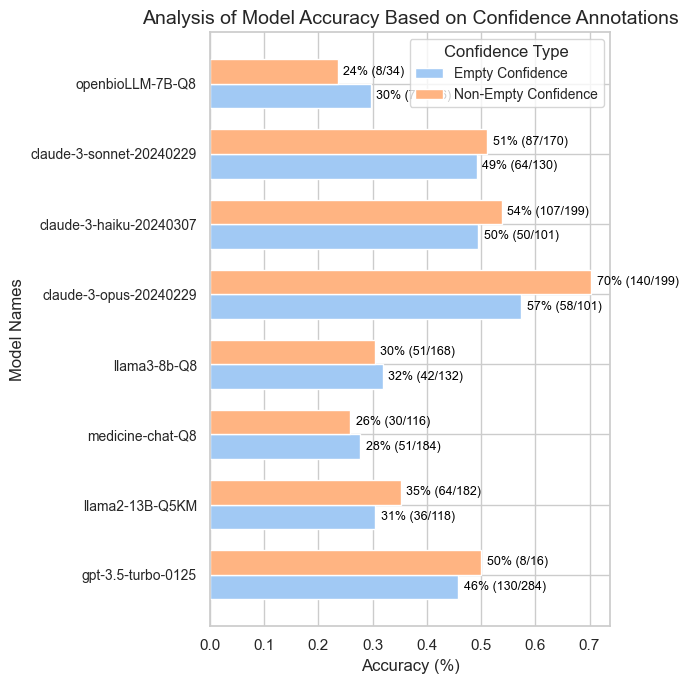

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_accuracy(df):
    # Initialize a dictionary to store results
    results = {}

    # Iterate through columns to gather data
    for confidence_col in df.columns:
        if "_confidence-" in confidence_col:
            # Get the model name by stripping the confidence suffix
            model_name = confidence_col.split('_confidence-')[0]
            correctness_col = f"{model_name}_correctness"
            
            # Check if both columns exist
            if correctness_col in df.columns:
                # Filter rows for current model
                confidence_data = df[confidence_col]
                correctness_data = df[correctness_col]

                # Create boolean series for empty and non-empty confidence
                is_empty_confidence = confidence_data.isin(['not_mentioned', 'cell_empty'])
                more_than_100_empty = is_empty_confidence.sum() > 100

                if more_than_100_empty:
                    n_empty_total = is_empty_confidence.sum()
                    n_non_empty_total = len(df) - n_empty_total

                    n_empty_correct = correctness_data[is_empty_confidence].str.lower().eq('correct').sum()
                    n_non_empty_correct = correctness_data[~is_empty_confidence].str.lower().eq('correct').sum()
                    
                    # Calculate accuracy
                    accuracy_empty = n_empty_correct / n_empty_total if n_empty_total > 0 else 0
                    accuracy_non_empty = n_non_empty_correct / n_non_empty_total if n_non_empty_total > 0 else 0

                    # Store the results
                    results[model_name] = {
                        'empty': (accuracy_empty, n_empty_correct, n_empty_total),
                        'non_empty': (accuracy_non_empty, n_non_empty_correct, n_non_empty_total)
                    }

    # Plotting
    sns.set_theme(style="whitegrid")  # Set a clean theme for better aesthetics
    fig, ax = plt.subplots(figsize=(7, 7))

    index = range(len(results))
    bar_width = 0.35

    # Bar plot values
    accuracy_empty = [results[model]['empty'][0] for model in results]
    accuracy_non_empty = [results[model]['non_empty'][0] for model in results]
    empty_labels = [f"{round(acc*100)}% ({correct}/{total})" for acc, correct, total in [results[model]['empty'] for model in results]]
    non_empty_labels = [f"{round(acc*100)}% ({correct}/{total})" for acc, correct, total in [results[model]['non_empty'] for model in results]]

    # Create vertical bars with a formal color palette
    ax.barh(index, accuracy_empty, bar_width, label='Empty Confidence', color=sns.color_palette("pastel")[0])
    ax.barh([i + bar_width for i in index], accuracy_non_empty, bar_width, label='Non-Empty Confidence', color=sns.color_palette("pastel")[1])

    # Annotate bars with accuracy values and counts
    for i, (empty_text, non_empty_text) in enumerate(zip(empty_labels, non_empty_labels)):
        ax.text(accuracy_empty[i] + 0.01, i, empty_text, ha='left', va='center', fontsize=9, color='black')
        ax.text(accuracy_non_empty[i] + 0.01, i + bar_width, non_empty_text, ha='left', va='center', fontsize=9, color='black')

    # Label details with improved clarity
    ax.set_ylabel('Model Names', fontsize=12)  # Improved axis label
    ax.set_xlabel('Accuracy (%)', fontsize=12)  # Improved axis label
    ax.set_title('Analysis of Model Accuracy Based on Confidence Annotations', fontsize=14)  # Enhanced title
    ax.set_yticks([i + bar_width/2 for i in index])
    ax.set_yticklabels(results.keys(), fontsize=10)
    ax.legend(title='Confidence Type', loc='upper right', fontsize=10)

    # Adjust layout for better readability
    plt.tight_layout()
    plt.show()

# Example usage with a sample DataFrame
# df = pd.DataFrame({...})
plot_model_accuracy(df_merged)

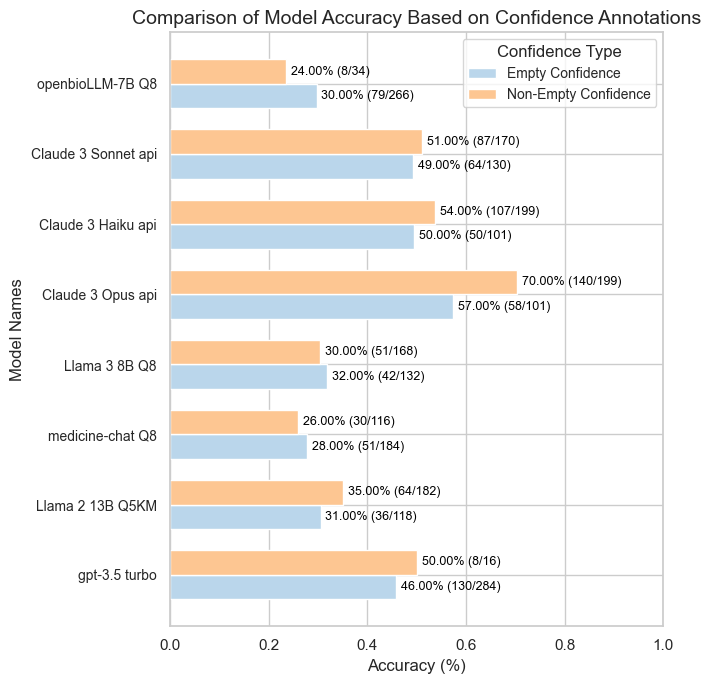

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

name_mapping = {
    'gpt-4-0613': 'GPT-4 api',
    'gpt-4o-2024-05-13': 'GPT-4o',
    'GPT4Web': 'GPT-4 Web-interface',
    'gpt-4o-mini-2024-07-18': 'GPT-4o Mini',
    'GPT3.5Web': 'GPT-3.5 Web-interface',
    'claude-3-5-sonnet-20240620': 'Claude 3.5 Sonnet',
    'ClaudeOpuWeb-raw': 'Claude Opus Web-interface',
    'claude-3-opus-20240229': 'Claude 3 Opus api',
    'claude-3-sonnet-20240229': 'Claude 3 Sonnet api',
    'ClaudeSonnetWeb-raw': 'Claude 3 Sonnet Web-interface',
    'ClaudeHiakuWeb-raw': 'Claude 3 Haiku Web-interface',
    'claude-3-haiku-20240307': 'Claude 3 Haiku api',
    'MistralLarge-Poe': 'Mistral Large',
    'mistral-instruct-v2-Q8': 'Mistral v2 Q8',
    'Mistral-7B-T': 'Mistral 7B',
    'Mixtral-8x7B-Poe': 'Mixtral 8x7B',
    'gemma2-9b-it': 'Gemma 2 9B',
    'GeminiWeb-raw': 'Gemini Web-interface',
    'GeminiAdvancedWeb-raw': 'Gemini Advanced Web-interface',
    'gemma2-27b-it': 'Gemma 2 27B',
    'Gemma2-9b-Q8': 'Gemma 2 9B Q8',
    'Phi3-medium14b-Q6': 'Phi-3 Medium 14B Q6',
    'phi3-3b-Q16': 'Phi-3 3B FP16',
    'Llama3.1-405B': 'Llama 3.1 405B',
    'Llama3-70b-Poe': 'Llama 3 70B',
    'Llama3.1-70B': 'Llama 3.1 70B',
    'Llama3.1-8B': 'Llama 3.1 8B',
    'llama2-13B-Q5KM': 'Llama 2 13B Q5KM',
    'Llama-2-13b': 'Llama 2 13B',
    'Llama270B-Poe': 'Llama 2 70B',
    'Llama27B-Poe': 'Llama 2 7B',
    'llama3-8b-Q8': 'Llama 3 8B Q8',
    'llama2-7B-Q8': 'Llama 2 7B Q8',
    'Llama3-8b-Poe': 'Llama 3 8B',
    'gpt-3.5-turbo-0125' : 'gpt-3.5 turbo',
    'medicine-chat-Q8' : 'medicine-chat Q8',
    'openbioLLM-7B-Q8':'openbioLLM-7B Q8'
}

def plot_model_accuracy(df):
    """
    Plot the model accuracy based on confidence annotations.

    Args:
        df (pd.DataFrame): A DataFrame containing model confidence and correctness data.

    Returns:
        None
    """

    # Initialize a dictionary to store results
    results = {}

    # Iterate through columns to gather data
    for confidence_col in df.columns:
        if "_confidence-" in confidence_col:
            # Get the model name by stripping the confidence suffix
            model_name = confidence_col.split('_confidence-')[0]
            correctness_col = f"{model_name}_correctness"
            
            # Check if both columns exist
            if correctness_col in df.columns:
                # Filter rows for current model
                confidence_data = df[confidence_col]
                correctness_data = df[correctness_col]

                # Create boolean series for empty and non-empty confidence
                is_empty_confidence = confidence_data.isin(['not_mentioned', 'cell_empty'])
                more_than_100_empty = is_empty_confidence.sum() > 100

                if more_than_100_empty:
                    n_empty_total = is_empty_confidence.sum()
                    n_non_empty_total = len(df) - n_empty_total

                    n_empty_correct = correctness_data[is_empty_confidence].str.lower().eq('correct').sum()
                    n_non_empty_correct = correctness_data[~is_empty_confidence].str.lower().eq('correct').sum()
                    
                    # Calculate accuracy
                    accuracy_empty = n_empty_correct / n_empty_total if n_empty_total > 0 else 0
                    accuracy_non_empty = n_non_empty_correct / n_non_empty_total if n_non_empty_total > 0 else 0

                    # Store the results
                    results[model_name] = {
                        'empty': (accuracy_empty, n_empty_correct, n_empty_total),
                        'non_empty': (accuracy_non_empty, n_non_empty_correct, n_non_empty_total)
                    }

    # Plotting
    sns.set_theme(style="whitegrid")  # Set a clean theme for better aesthetics
    fig, ax = plt.subplots(figsize=(7, 7))

    index = range(len(results))
    bar_width = 0.35

    # Convert model names to user-friendly names
    model_names = [name_mapping[model_name] for model_name in results.keys()]

    # Bar plot values
    accuracy_empty = [results[model]['empty'][0] for model in results]
    accuracy_non_empty = [results[model]['non_empty'][0] for model in results]
    empty_labels = [f"{round(acc*100):.2f}% ({correct}/{total})" for acc, correct, total in [results[model]['empty'] for model in results]]
    non_empty_labels = [f"{round(acc*100):.2f}% ({correct}/{total})" for acc, correct, total in [results[model]['non_empty'] for model in results]]

    # Create vertical bars with a formal color palette
    ax.barh(index, accuracy_empty, bar_width, label='Empty Confidence', color=sns.color_palette("Blues")[1])
    ax.barh([i + bar_width for i in index], accuracy_non_empty, bar_width, label='Non-Empty Confidence', color=sns.color_palette("Oranges")[1])

    # Annotate bars with accuracy values and counts
    for i, (empty_text, non_empty_text) in enumerate(zip(empty_labels, non_empty_labels)):
        ax.text(accuracy_empty[i] + 0.01, i, empty_text, ha='left', va='center', fontsize=9, color='black')
        ax.text(accuracy_non_empty[i] + 0.01, i + bar_width, non_empty_text, ha='left', va='center', fontsize=9, color='black')

    # Label details with improved clarity
    ax.set_ylabel('Model Names', fontsize=12)  # Improved axis label
    ax.set_xlabel('Accuracy (%)', fontsize=12)  # Improved axis label
    ax.set_title('Comparison of Model Accuracy Based on Confidence Annotations', fontsize=14)  # Enhanced title
    ax.set_yticks([i + bar_width/2 for i in index])
    ax.set_yticklabels(model_names, fontsize=10)
    ax.legend(title='Confidence Type', loc='upper right', fontsize=10)
    ax.set_xlim([0, 1])  # Set x-axis limits

    # Adjust layout for better readability
    plt.tight_layout()
    plt.savefig('model_accuracy.png', dpi=300)  # Save plot as a high-resolution PNG
    plt.show()

# Example usage with a sample DataFrame
# df = pd.DataFrame({...})
plot_model_accuracy(df_merged)

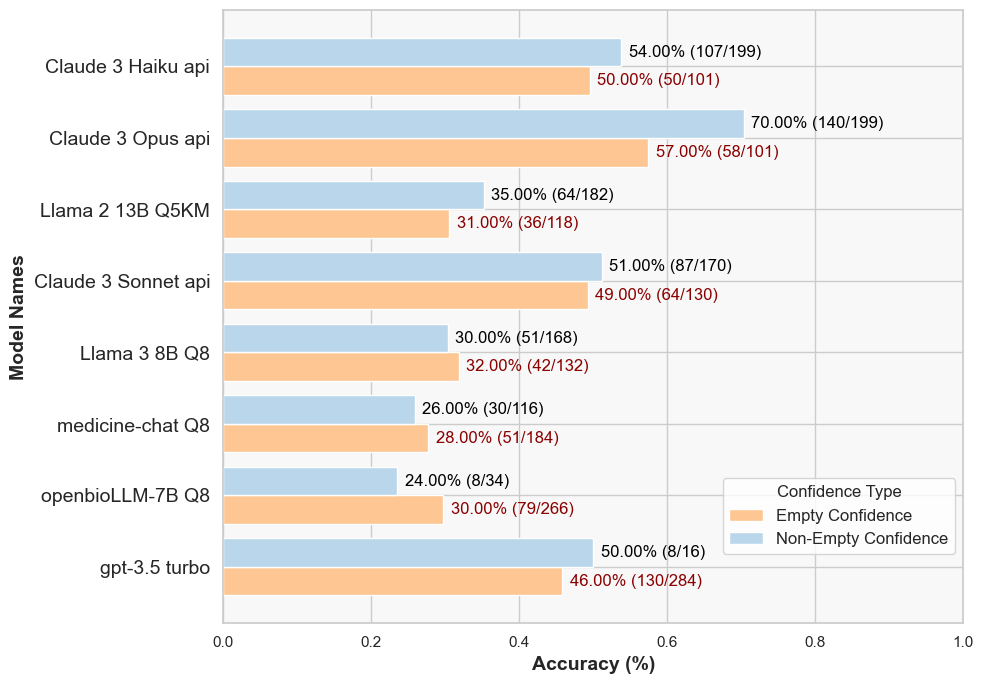

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

name_mapping = {
    'gpt-4-0613': 'GPT-4 api',
    'gpt-4o-2024-05-13': 'GPT-4o',
    'GPT4Web': 'GPT-4 Web-interface',
    'gpt-4o-mini-2024-07-18': 'GPT-4o Mini',
    'GPT3.5Web': 'GPT-3.5 Web-interface',
    'claude-3-5-sonnet-20240620': 'Claude 3.5 Sonnet',
    'ClaudeOpuWeb-raw': 'Claude Opus Web-interface',
    'claude-3-opus-20240229': 'Claude 3 Opus api',
    'claude-3-sonnet-20240229': 'Claude 3 Sonnet api',
    'ClaudeSonnetWeb-raw': 'Claude 3 Sonnet Web-interface',
    'ClaudeHiakuWeb-raw': 'Claude 3 Haiku Web-interface',
    'claude-3-haiku-20240307': 'Claude 3 Haiku api',
    'MistralLarge-Poe': 'Mistral Large',
    'mistral-instruct-v2-Q8': 'Mistral v2 Q8',
    'Mistral-7B-T': 'Mistral 7B',
    'Mixtral-8x7B-Poe': 'Mixtral 8x7B',
    'gemma2-9b-it': 'Gemma 2 9B',
    'GeminiWeb-raw': 'Gemini Web-interface',
    'GeminiAdvancedWeb-raw': 'Gemini Advanced Web-interface',
    'gemma2-27b-it': 'Gemma 2 27B',
    'Gemma2-9b-Q8': 'Gemma 2 9B Q8',
    'Phi3-medium14b-Q6': 'Phi-3 Medium 14B Q6',
    'phi3-3b-Q16': 'Phi-3 3B FP16',
    'Llama3.1-405B': 'Llama 3.1 405B',
    'Llama3-70b-Poe': 'Llama 3 70B',
    'Llama3.1-70B': 'Llama 3.1 70B',
    'Llama3.1-8B': 'Llama 3.1 8B',
    'llama2-13B-Q5KM': 'Llama 2 13B Q5KM',
    'Llama-2-13b': 'Llama 2 13B',
    'Llama270B-Poe': 'Llama 2 70B',
    'Llama27B-Poe': 'Llama 2 7B',
    'llama3-8b-Q8': 'Llama 3 8B Q8',
    'llama2-7B-Q8': 'Llama 2 7B Q8',
    'Llama3-8b-Poe': 'Llama 3 8B',
    'gpt-3.5-turbo-0125' : 'gpt-3.5 turbo',
    'medicine-chat-Q8' : 'medicine-chat Q8',
    'openbioLLM-7B-Q8':'openbioLLM-7B Q8'
}

def plot_model_accuracy(df):
    """
    Plot the model accuracy based on confidence annotations.

    Args:
        df (pd.DataFrame): A DataFrame containing model confidence and correctness data.

    Returns:
        None
    """

    # Initialize a dictionary to store results
    results = {}

    # Iterate through columns to gather data
    for confidence_col in df.columns:
        if "_confidence-" in confidence_col:
            # Get the model name by stripping the confidence suffix
            model_name = confidence_col.split('_confidence-')[0]
            correctness_col = f"{model_name}_correctness"
            
            # Check if both columns exist
            if correctness_col in df.columns:
                # Filter rows for current model
                confidence_data = df[confidence_col]
                correctness_data = df[correctness_col]

                # Create boolean series for empty and non-empty confidence
                is_empty_confidence = confidence_data.isin(['not_mentioned', 'cell_empty'])
                more_than_100_empty = is_empty_confidence.sum() > 100

                if more_than_100_empty:
                    n_empty_total = is_empty_confidence.sum()
                    n_non_empty_total = len(df) - n_empty_total

                    n_empty_correct = correctness_data[is_empty_confidence].str.lower().eq('correct').sum()
                    n_non_empty_correct = correctness_data[~is_empty_confidence].str.lower().eq('correct').sum()
                    
                    # Calculate accuracy
                    accuracy_empty = n_empty_correct / n_empty_total if n_empty_total > 0 else 0
                    accuracy_non_empty = n_non_empty_correct / n_non_empty_total if n_non_empty_total > 0 else 0

                    # Store the results
                    results[model_name] = {
                        'empty': (accuracy_empty, n_empty_correct, n_empty_total),
                        'non_empty': (accuracy_non_empty, n_non_empty_correct, n_non_empty_total)
                    }

    # Sort results by the number of empty confidence entries
    sorted_results = dict(sorted(results.items(), key=lambda item: item[1]['empty'][2], reverse=True))

    # Plotting
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10,7))
    ax.set_facecolor('#f8f8f8')
    index = range(len(sorted_results))
    bar_width = 0.4

    # Convert model names to user-friendly names
    model_names = [name_mapping[model_name] for model_name in sorted_results.keys()]

    # Bar plot values
    accuracy_empty = [sorted_results[model]['empty'][0] for model in sorted_results]
    accuracy_non_empty = [sorted_results[model]['non_empty'][0] for model in sorted_results]
    empty_labels = [f"{round(acc*100):.2f}% ({correct}/{total})" for acc, correct, total in [sorted_results[model]['empty'] for model in sorted_results]]
    non_empty_labels = [f"{round(acc*100):.2f}% ({correct}/{total})" for acc, correct, total in [sorted_results[model]['non_empty'] for model in sorted_results]]

    # Create vertical bars with a formal color palette
    ax.barh(index, accuracy_empty, bar_width, label='Empty Confidence', color=sns.color_palette("Oranges")[1])
    ax.barh([i + bar_width for i in index], accuracy_non_empty, bar_width, label='Non-Empty Confidence', color=sns.color_palette("Blues")[1])

    # Annotate bars with accuracy values and counts

    for i, (empty_text, non_empty_text) in enumerate(zip(empty_labels, non_empty_labels)):
        ax.text(accuracy_empty[i] + 0.01, i, empty_text, ha='left', va='center', fontsize=12, color='darkred')
        ax.text(accuracy_non_empty[i] + 0.01, i + bar_width, non_empty_text, ha='left', va='center', fontsize=12, color='black')

    # Label details with improved clarity
    ax.set_ylabel('Model Names', fontsize=14,fontweight="bold")
    ax.set_xlabel('Accuracy (%)', fontsize=14
                  ,fontweight="bold")
    # ax.set_title('accuracy difference for high empty confidence models', fontsize=18,fontweight="bold")
    ax.set_yticks([i + bar_width/2 for i in index])
    ax.set_yticklabels(model_names, fontsize=14)
    ax.legend(title='Confidence Type', loc='lower right', bbox_to_anchor=(1, 0.1), fontsize=12)
    ax.set_xlim([0, 1])

    # Adjust layout for better readability
    plt.tight_layout()
    plt.savefig('model_accuracy.png', dpi=300)
    plt.savefig('model_accuracy.pdf', dpi=300)
    plt.savefig('model_accuracy.jpg', dpi=300)
    plt.show()

# Example usage with a sample DataFrame
# df = pd.DataFrame({...})
plot_model_accuracy(df_merged)

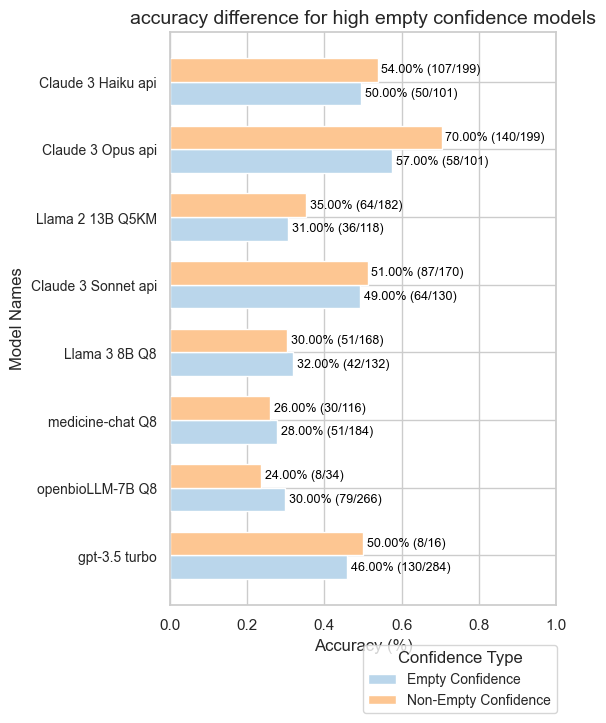

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

name_mapping = {
    'gpt-4-0613': 'GPT-4 api',
    'gpt-4o-2024-05-13': 'GPT-4o',
    'GPT4Web': 'GPT-4 Web-interface',
    'gpt-4o-mini-2024-07-18': 'GPT-4o Mini',
    'GPT3.5Web': 'GPT-3.5 Web-interface',
    'claude-3-5-sonnet-20240620': 'Claude 3.5 Sonnet',
    'ClaudeOpuWeb-raw': 'Claude Opus Web-interface',
    'claude-3-opus-20240229': 'Claude 3 Opus api',
    'claude-3-sonnet-20240229': 'Claude 3 Sonnet api',
    'ClaudeSonnetWeb-raw': 'Claude 3 Sonnet Web-interface',
    'ClaudeHiakuWeb-raw': 'Claude 3 Haiku Web-interface',
    'claude-3-haiku-20240307': 'Claude 3 Haiku api',
    'MistralLarge-Poe': 'Mistral Large',
    'mistral-instruct-v2-Q8': 'Mistral v2 Q8',
    'Mistral-7B-T': 'Mistral 7B',
    'Mixtral-8x7B-Poe': 'Mixtral 8x7B',
    'gemma2-9b-it': 'Gemma 2 9B',
    'GeminiWeb-raw': 'Gemini Web-interface',
    'GeminiAdvancedWeb-raw': 'Gemini Advanced Web-interface',
    'gemma2-27b-it': 'Gemma 2 27B',
    'Gemma2-9b-Q8': 'Gemma 2 9B Q8',
    'Phi3-medium14b-Q6': 'Phi-3 Medium 14B Q6',
    'phi3-3b-Q16': 'Phi-3 3B FP16',
    'Llama3.1-405B': 'Llama 3.1 405B',
    'Llama3-70b-Poe': 'Llama 3 70B',
    'Llama3.1-70B': 'Llama 3.1 70B',
    'Llama3.1-8B': 'Llama 3.1 8B',
    'llama2-13B-Q5KM': 'Llama 2 13B Q5KM',
    'Llama-2-13b': 'Llama 2 13B',
    'Llama270B-Poe': 'Llama 2 70B',
    'Llama27B-Poe': 'Llama 2 7B',
    'llama3-8b-Q8': 'Llama 3 8B Q8',
    'llama2-7B-Q8': 'Llama 2 7B Q8',
    'Llama3-8b-Poe': 'Llama 3 8B',
    'gpt-3.5-turbo-0125' : 'gpt-3.5 turbo',
    'medicine-chat-Q8' : 'medicine-chat Q8',
    'openbioLLM-7B-Q8':'openbioLLM-7B Q8'
}

def plot_model_accuracy(df):
    """
    Plot the model accuracy based on confidence annotations.

    Args:
        df (pd.DataFrame): A DataFrame containing model confidence and correctness data.

    Returns:
        None
    """

    # Initialize a dictionary to store results
    results = {}

    # Iterate through columns to gather data
    for confidence_col in df.columns:
        if "_confidence-" in confidence_col:
            # Get the model name by stripping the confidence suffix
            model_name = confidence_col.split('_confidence-')[0]
            correctness_col = f"{model_name}_correctness"
            
            # Check if both columns exist
            if correctness_col in df.columns:
                # Filter rows for current model
                confidence_data = df[confidence_col]
                correctness_data = df[correctness_col]

                # Create boolean series for empty and non-empty confidence
                is_empty_confidence = confidence_data.isin(['not_mentioned', 'cell_empty'])
                more_than_100_empty = is_empty_confidence.sum() > 100

                if more_than_100_empty:
                    n_empty_total = is_empty_confidence.sum()
                    n_non_empty_total = len(df) - n_empty_total

                    n_empty_correct = correctness_data[is_empty_confidence].str.lower().eq('correct').sum()
                    n_non_empty_correct = correctness_data[~is_empty_confidence].str.lower().eq('correct').sum()
                    
                    # Calculate accuracy
                    accuracy_empty = n_empty_correct / n_empty_total if n_empty_total > 0 else 0
                    accuracy_non_empty = n_non_empty_correct / n_non_empty_total if n_non_empty_total > 0 else 0

                    # Store the results
                    results[model_name] = {
                        'empty': (accuracy_empty, n_empty_correct, n_empty_total),
                        'non_empty': (accuracy_non_empty, n_non_empty_correct, n_non_empty_total)
                    }

    # Sort results by the number of empty confidence entries
    sorted_results = dict(sorted(results.items(), key=lambda item: item[1]['empty'][2], reverse=True))

    # Plotting
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(7, 7))

    index = range(len(sorted_results))
    bar_width = 0.35

    # Convert model names to user-friendly names
    model_names = [name_mapping[model_name] for model_name in sorted_results.keys()]

    # Bar plot values
    accuracy_empty = [sorted_results[model]['empty'][0] for model in sorted_results]
    accuracy_non_empty = [sorted_results[model]['non_empty'][0] for model in sorted_results]
    empty_labels = [f"{round(acc*100):.2f}% ({correct}/{total})" for acc, correct, total in [sorted_results[model]['empty'] for model in sorted_results]]
    non_empty_labels = [f"{round(acc*100):.2f}% ({correct}/{total})" for acc, correct, total in [sorted_results[model]['non_empty'] for model in sorted_results]]

    # Create vertical bars with a formal color palette
    ax.barh(index, accuracy_empty, bar_width, label='Empty Confidence', color=sns.color_palette("Blues")[1])
    ax.barh([i + bar_width for i in index], accuracy_non_empty, bar_width, label='Non-Empty Confidence', color=sns.color_palette("Oranges")[1])

    # Annotate bars with accuracy values and counts
    for i, (empty_text, non_empty_text) in enumerate(zip(empty_labels, non_empty_labels)):
        ax.text(accuracy_empty[i] + 0.01, i, empty_text, ha='left', va='center', fontsize=9, color='black')
        ax.text(accuracy_non_empty[i] + 0.01, i + bar_width, non_empty_text, ha='left', va='center', fontsize=9, color='black')

    # Label details with improved clarity
    ax.set_ylabel('Model Names', fontsize=12)
    ax.set_xlabel('Accuracy (%)', fontsize=12)
    ax.set_title('accuracy difference for high empty confidence models', fontsize=14)
    ax.set_yticks([i + bar_width/2 for i in index])
    ax.set_yticklabels(model_names, fontsize=10)
    
    # Legend
    ax.legend(title='Confidence Type', loc='lower right', bbox_to_anchor=(1.02, -0.2), fontsize=10)
    ax.set_xlim([0, 1])

    # Adjust layout for better readability
    plt.tight_layout(pad=0.1, rect=[0,0,0.8,1])  # pad is added and rect to make space for legend 
    plt.savefig('model_accuracy.png', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage with a sample DataFrame
# df = pd.DataFrame({...})
plot_model_accuracy(df_merged)